In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [3]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [4]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [5]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [6]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [7]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [8]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [9]:
column1=['Hotel_name','mean_reviewer_score']

In [10]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [11]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [12]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [13]:
TransitGroups=Connect.transit_count.unique()

In [14]:
TransitGroups.size

17

In [15]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [43]:
bins = [-1, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 2]    1088.0
(2, 4]      258.0
(4, 6]       75.0
(6, 8]       38.0
(8, 20]      18.0
dtype: float64

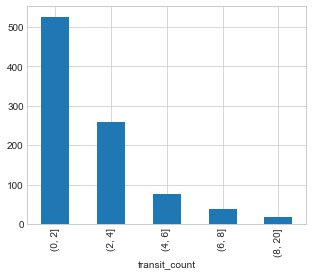

In [42]:
Transits.plot('bar')
plt.show()

In [31]:
Con1 = Connect[Connect.transit_count<3].mean_reviewer_score.mean()
Con1

8.47961130063161

In [32]:
Con2 = Connect[(Connect['transit_count']>2) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.421865272970749

In [33]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [34]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [35]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [36]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [37]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [38]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [39]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [40]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

Text(0,0.5,'Number of Hotels')

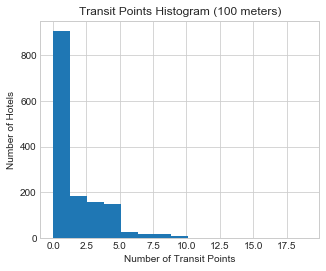

In [46]:
hist_plot = Connect['transit_count'].hist(bins=15)
hist_plot.set_title('Transit Points Histogram (100 meters)')
hist_plot.set_xlabel('Number of Transit Points')
hist_plot.set_ylabel('Number of Hotels')